In [1]:
import pandas as pd
import numpy as np
from nselib import capital_market
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Geting Dataset

In [2]:
df = capital_market.price_volume_and_deliverable_position_data(symbol='TATAMOTORS',
                                                               from_date='15-01-2024',
                                                               to_date='15-01-2025')

In [3]:
months = {'JAN':'01','FEB':'02','MAR':'03','APR':'04','MAY':'05','JUN':'06',
          'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
         'JUL':'07','AUG':'08','SEP':'09','OCT':'10','NOV':'11','DEC':'12',
         'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'}
for key in months.keys():
    df['Date'] = df['Date'].str.replace(key, months[key])

In [4]:
df.drop(columns=['Symbol'], inplace=True, axis=1)
df['Date']=pd.to_datetime(df['Date'],dayfirst=True)
df.set_index('Date', inplace=True)
df.replace({',':'','-':np.nan},regex=True,inplace=True)
df.rename(columns={'ï»¿"Symbol"':'Symbol', '%DlyQttoTradedQty':'Dly_Qt_to_Traded_Qty%'}, inplace=True)
num_columns = ['PrevClose', 'OpenPrice', 'HighPrice',
       'LowPrice', 'LastPrice', 'ClosePrice', 'AveragePrice',
       'TotalTradedQuantity', 'TurnoverInRs', 'No.ofTrades', 'DeliverableQty',
       'Dly_Qt_to_Traded_Qty%']
for coll in num_columns:
    df[coll] = df[coll].astype('Float64')

In [5]:
df.tail(5)

,Series,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,ClosePrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,Dly_Qt_to_Traded_Qty%,Symbol
Date,,,,,,,,,,,,,,
2025-01-09,EQ,794.95,800.0,810.0,769.45,781.4,780.1,784.85,17948464.0,14086940933.35,366805.0,5560219.0,30.98,TATAMOTORS
2025-01-10,EQ,780.1,780.05,787.95,766.8,776.5,774.65,778.29,11144005.0,8673268253.450001,274052.0,2369387.0,21.26,TATAMOTORS
2025-01-13,EQ,774.65,769.0,773.55,748.8,750.6,751.0,760.91,12230175.0,9306120971.5,305264.0,4343305.0,35.51,TATAMOTORS
2025-01-14,EQ,751.0,751.5,779.0,751.5,772.3,770.5,772.37,11377053.0,8787240473.25,277895.0,3304819.0,29.05,TATAMOTORS
2025-01-15,EQ,770.5,771.0,785.0,756.05,763.0,763.6,766.16,10500910.0,8045421842.2,249215.0,3468381.0,33.03,TATAMOTORS


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-01-15 to 2025-01-15
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Series                 251 non-null    object 
 1   PrevClose              251 non-null    Float64
 2   OpenPrice              251 non-null    Float64
 3   HighPrice              251 non-null    Float64
 4   LowPrice               251 non-null    Float64
 5   LastPrice              251 non-null    Float64
 6   ClosePrice             251 non-null    Float64
 7   AveragePrice           251 non-null    Float64
 8   TotalTradedQuantity    251 non-null    Float64
 9   TurnoverInRs           251 non-null    Float64
 10  No.ofTrades            251 non-null    Float64
 11  DeliverableQty         250 non-null    Float64
 12  Dly_Qt_to_Traded_Qty%  250 non-null    Float64
 13  Symbol                 251 non-null    object 
dtypes: Float64(12), object(2)
memory usage:

In [7]:
df.columns

Index(['Series', 'PrevClose', 'OpenPrice', 'HighPrice', 'LowPrice',
       'LastPrice', 'ClosePrice', 'AveragePrice', 'TotalTradedQuantity',
       'TurnoverInRs', 'No.ofTrades', 'DeliverableQty',
       'Dly_Qt_to_Traded_Qty%', 'Symbol'],
      dtype='object')

# Spliting Dataset

In [8]:
from sklearn.model_selection import train_test_split
colls = ['PrevClose', 'OpenPrice', 'HighPrice', 'LowPrice',
       'LastPrice', 'AveragePrice', 'TotalTradedQuantity',
       'TurnoverInRs', 'No.ofTrades', 'DeliverableQty',
       'Dly_Qt_to_Traded_Qty%']
X_train,X_test,y_train,y_test = train_test_split(df[colls],
                                                 df['ClosePrice'],
                                                 test_size=.2)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200, 11), (200,), (51, 11), (51,))

# StandardScaler

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
scaler.mean_, scaler.scale_

(array([9.39570500e+02, 9.45184250e+02, 9.54681250e+02, 9.31267750e+02,
        9.42331500e+02, 9.42824900e+02, 1.25970508e+07, 1.18606327e+10,
        3.03840585e+05, 5.42882486e+06, 4.37410050e+01]),
 array([1.07161808e+02, 1.00837228e+02, 1.01166763e+02, 9.94831947e+01,
        1.00685654e+02, 1.00424093e+02, 7.98590777e+06, 7.87962152e+09,
        1.66730275e+05, 3.26490031e+06, 8.74337601e+00]))

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Standardizated dataset description

In [13]:
np.round(X_train_scaled.describe(),1)

,PrevClose,OpenPrice,HighPrice,LowPrice,LastPrice,AveragePrice,TotalTradedQuantity,TurnoverInRs,No.ofTrades,DeliverableQty,Dly_Qt_to_Traded_Qty%
count,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,199.0,199.0
mean,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-4.8,-2.2,-2.1,-2.1,-2.2,-2.1,-1.6,-1.5,-1.8,-1.4,-2.7
25%,-0.7,-0.7,-0.7,-0.7,-0.7,-0.7,-0.6,-0.6,-0.6,-0.7,-0.7
50%,0.2,0.2,0.2,0.2,0.2,0.2,-0.2,-0.3,-0.2,-0.2,0.1
75%,0.6,0.6,0.6,0.7,0.7,0.7,0.3,0.2,0.3,0.3,0.6
max,2.1,2.2,2.2,2.2,2.2,2.2,5.9,6.3,5.7,6.3,2.4


# Comperision between scaled and un-scaled Dataset

## Bird Eye View

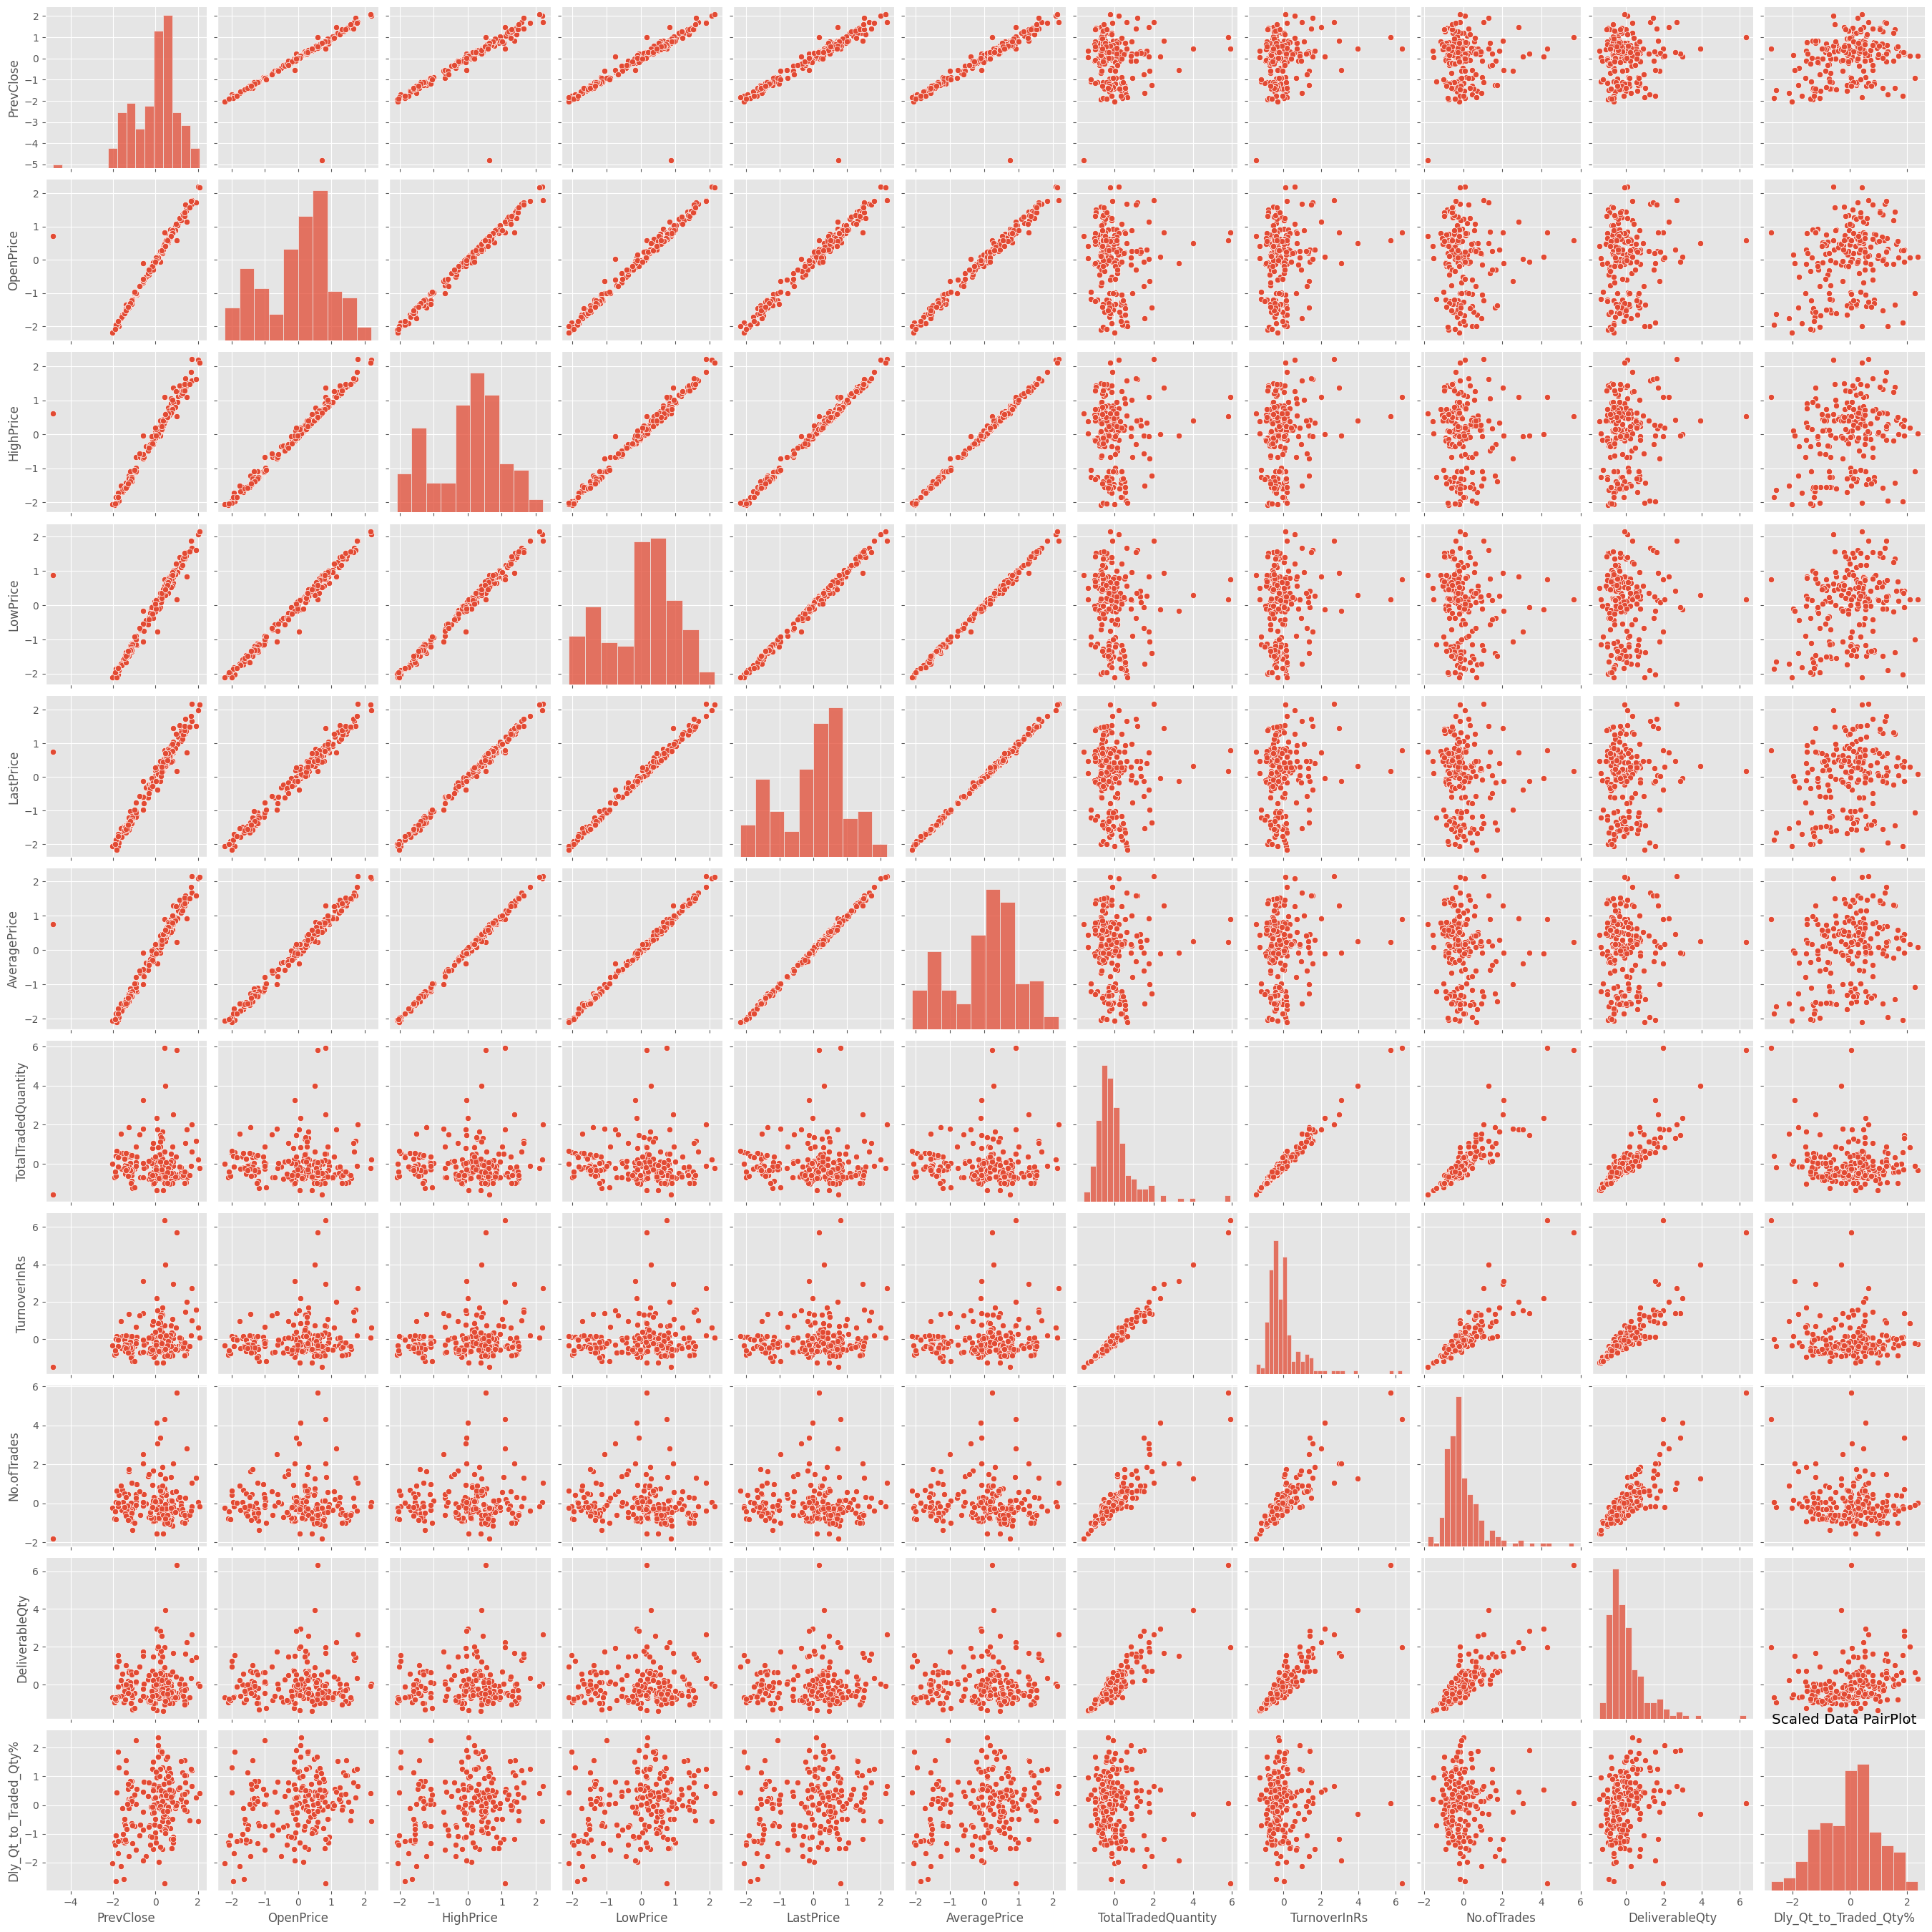

In [14]:
sns.pairplot(X_train_scaled)
plt.title("Scaled Data PairPlot")
plt.show()

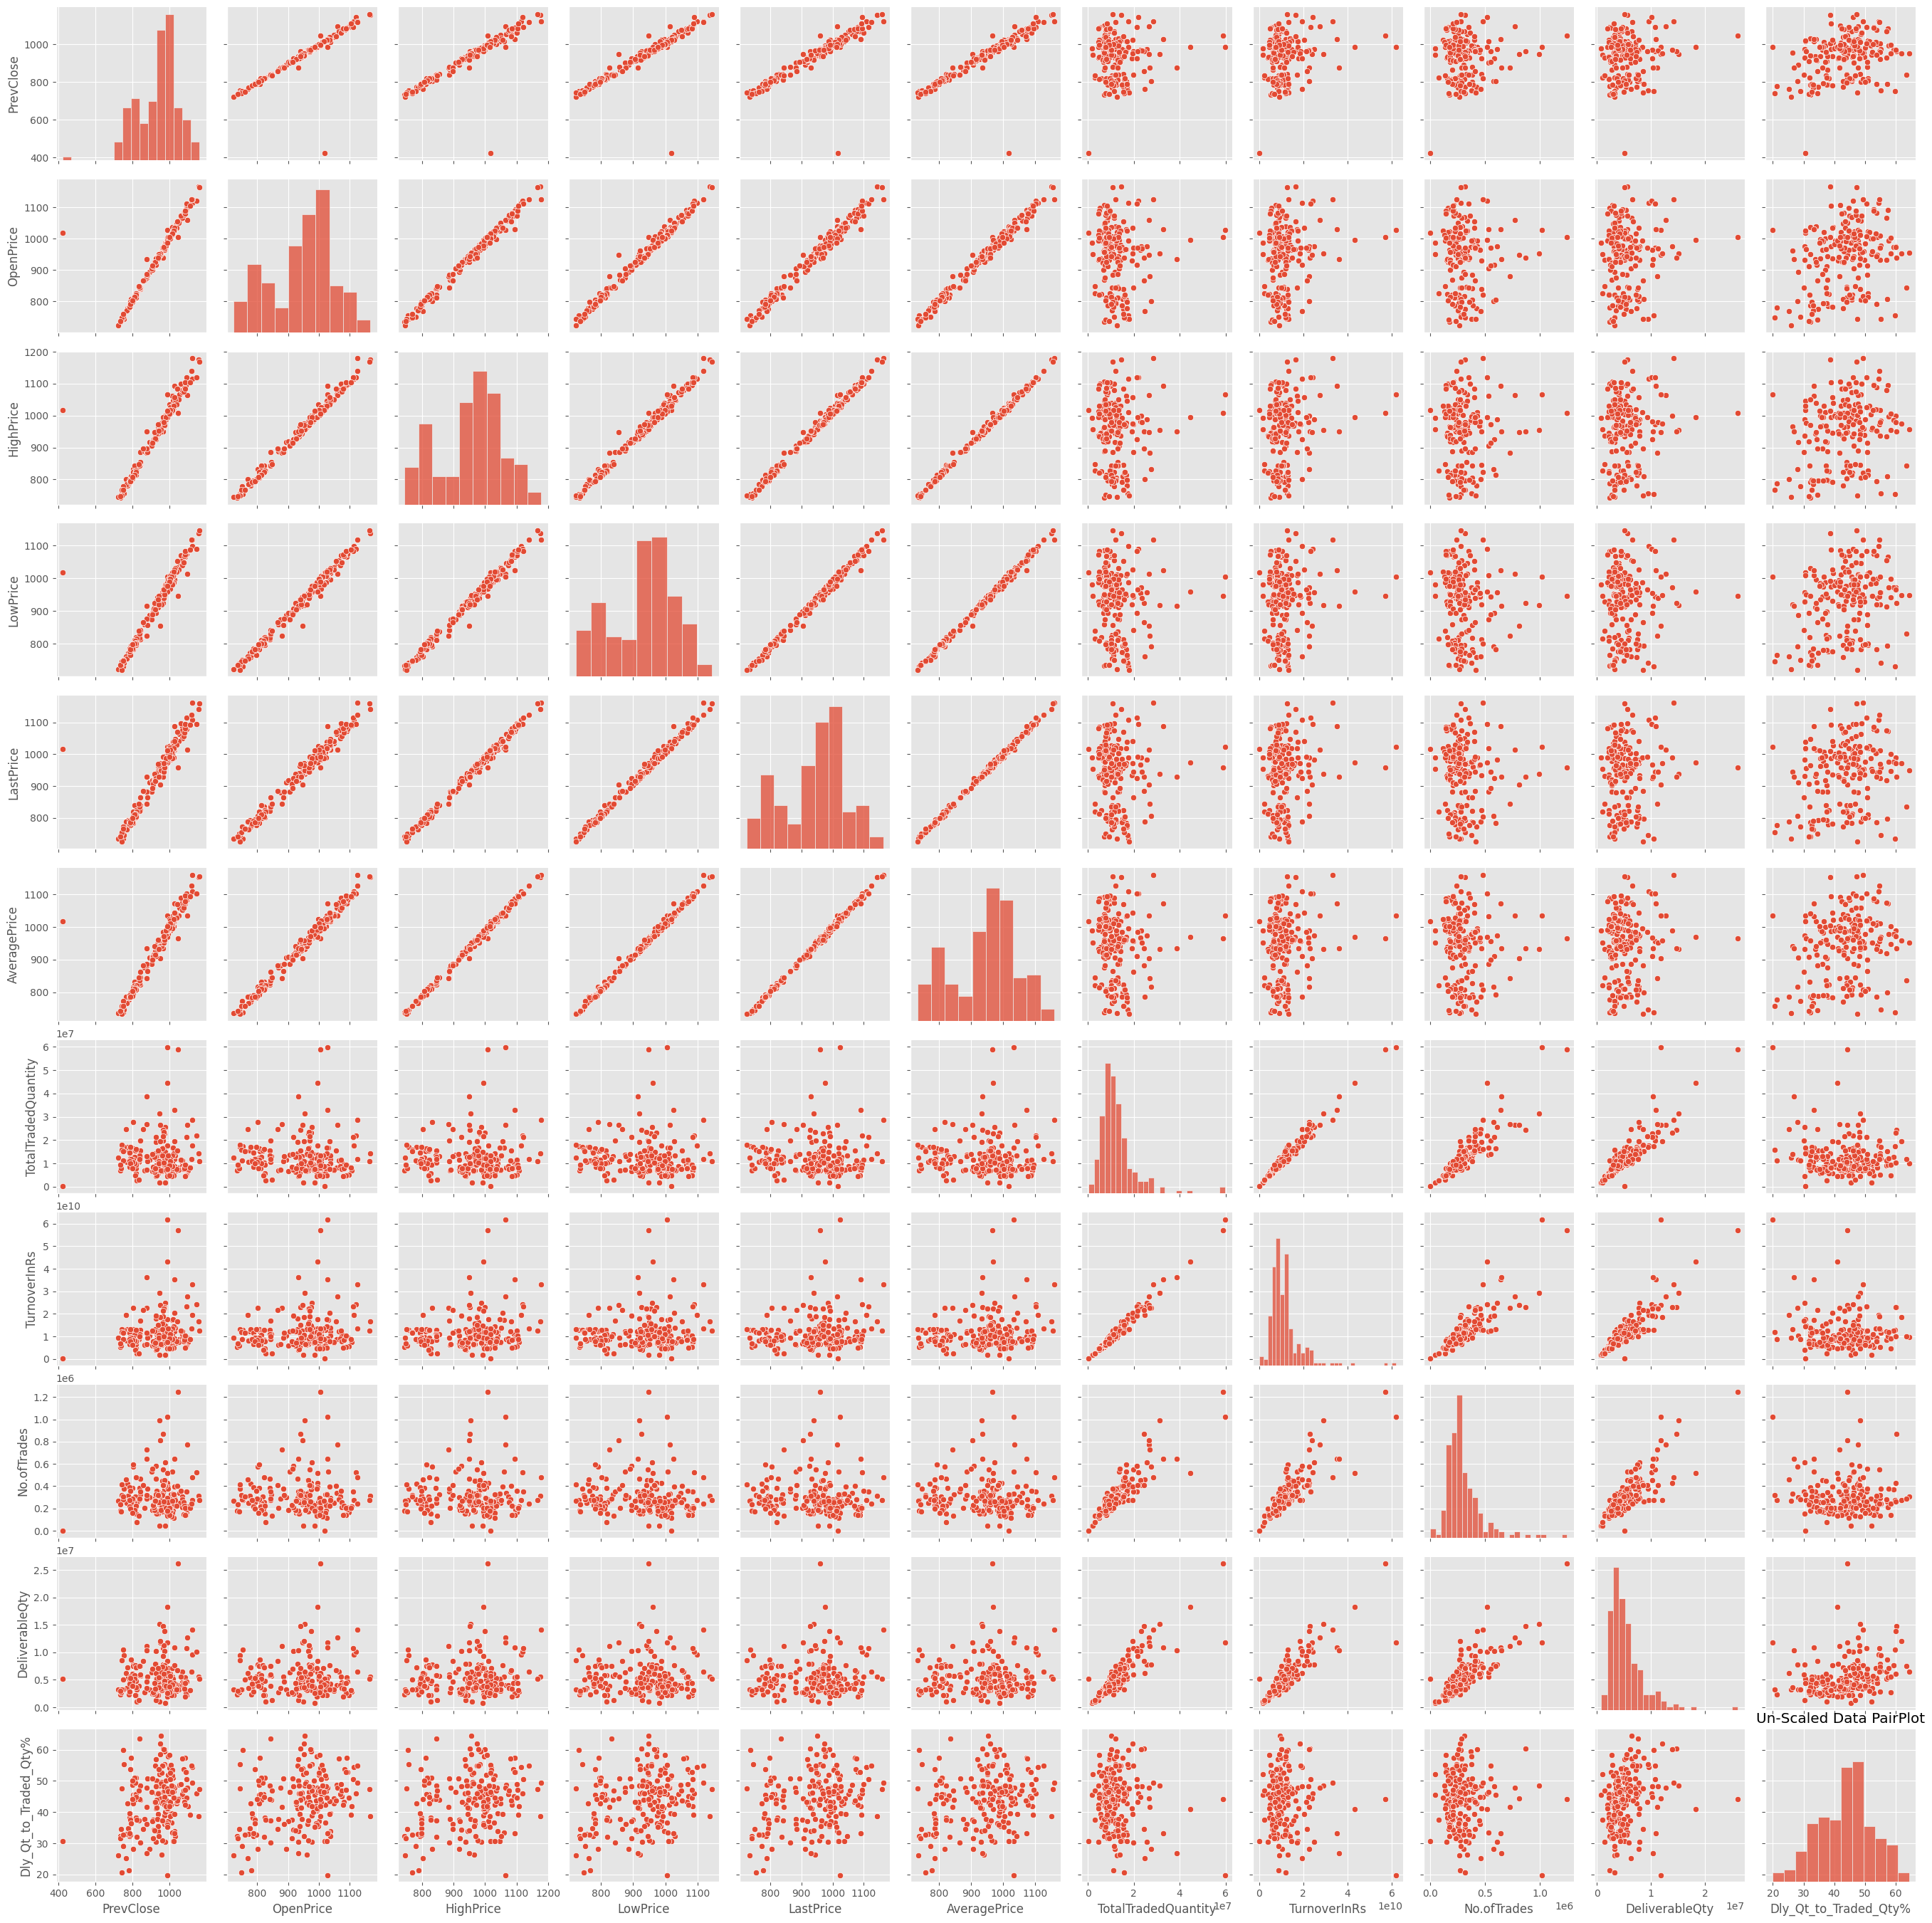

In [15]:
sns.pairplot(X_train)
plt.title("Un-Scaled Data PairPlot")
plt.show()

## Individual Scatterplot Comparision

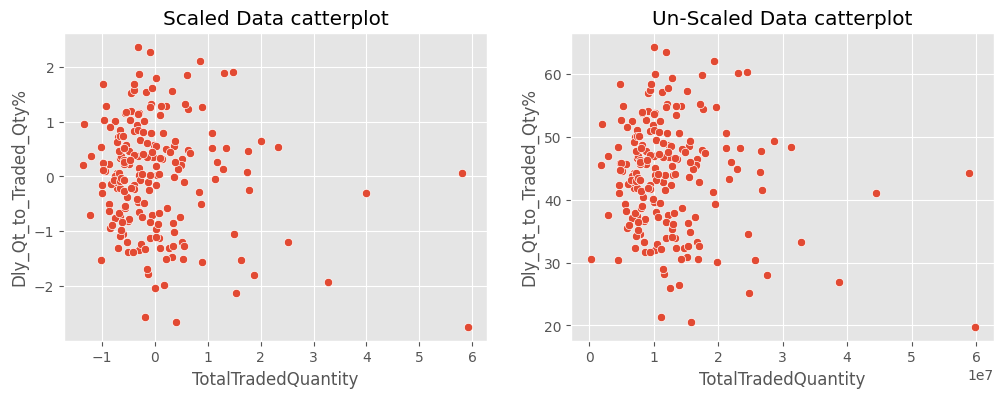

In [16]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.scatterplot(x=X_train_scaled['TotalTradedQuantity'],y=X_train_scaled['Dly_Qt_to_Traded_Qty%'])
plt.title("Scaled Data catterplot")

plt.subplot(1,2,2)
sns.scatterplot(x=X_train['TotalTradedQuantity'],y=X_train['Dly_Qt_to_Traded_Qty%'])
plt.title("Un-Scaled Data catterplot")
plt.show()

## PDF Graph Comperision

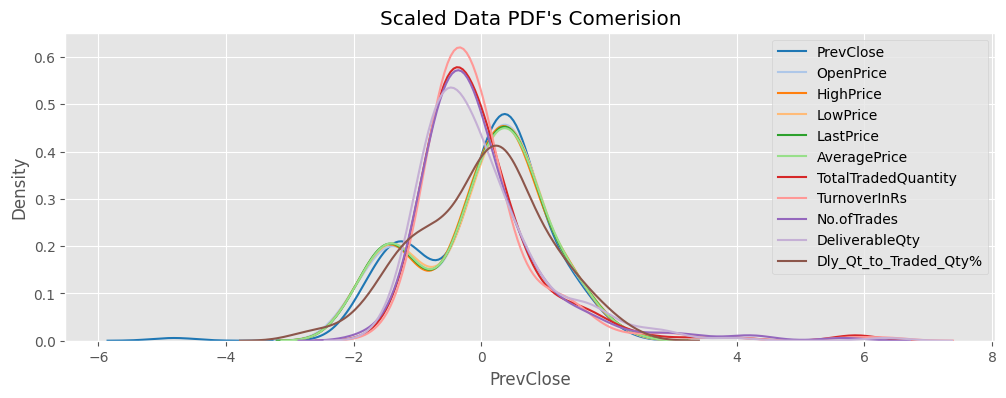

In [17]:
plt.figure(figsize=(12,4))
colors = sns.color_palette("tab20")[:len(X_train.columns)]
for col, color in zip(X_train_scaled.columns, colors):
    sns.kdeplot(X_train_scaled[col],label=col, color=color)
plt.title("Scaled Data PDF's Comerision")
plt.legend()
plt.show()

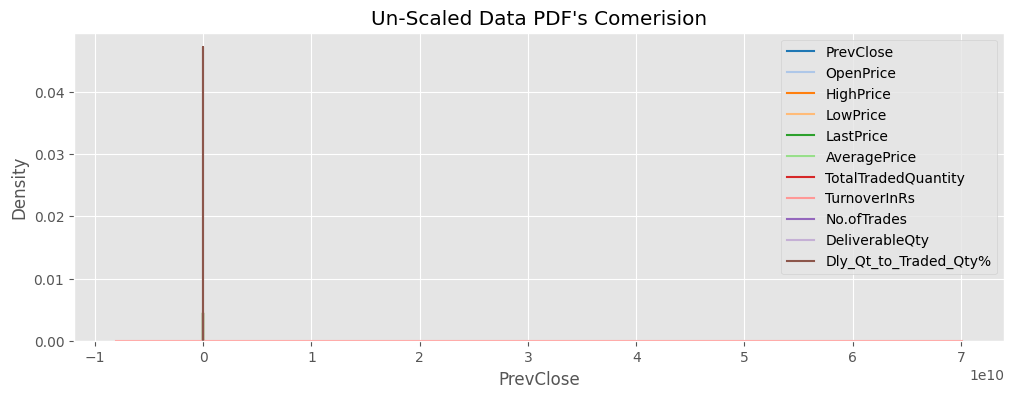

In [18]:
plt.figure(figsize=(12,4))
colors = sns.color_palette("tab20")[:len(X_train.columns)]
for col, color in zip(X_train.columns, colors):
    sns.kdeplot(X_train[col],label=col, color=color)
plt.title("Un-Scaled Data PDF's Comerision")
plt.legend()
plt.show()

## PDF Graph Comperison of same column (Scaled Vs Un-Scaled)

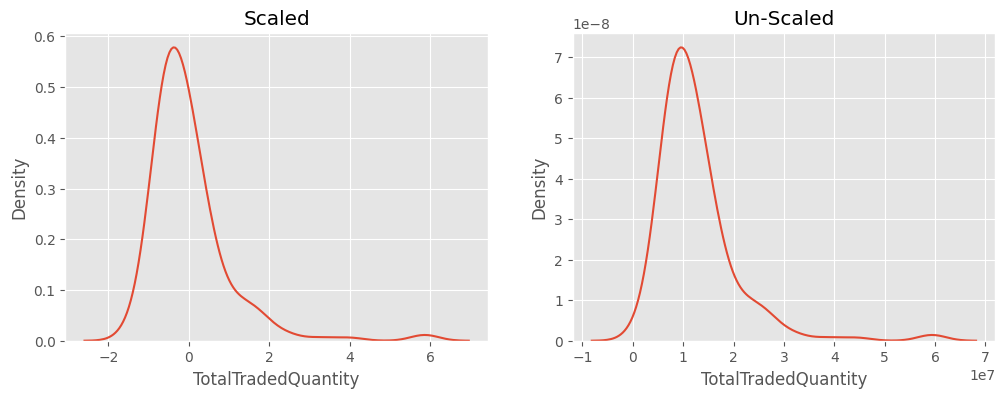

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.kdeplot(X_train_scaled['TotalTradedQuantity'],label='TotalTradedQuantity')
plt.title("Scaled")
plt.subplot(1,2,2)
sns.kdeplot(X_train['TotalTradedQuantity'],label='TotalTradedQuantity')
plt.title("Un-Scaled")
plt.show()